In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('salary_data_cleaned.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,age,min_salary,employer_provided,max_salary,avg_salary,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,47,53,0,91,72.0,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,36,63,0,112,87.5,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,10,80,0,90,85.0,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,55,56,0,97,76.5,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,22,86,0,143,114.5,1,0,0,0,1


In [32]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer privided', 'company_txt', 'job_state', 'same_state',
       'age', 'min_salary', 'employer_provided', 'max_salary', 'avg_salary',
       'python_yn', 'R_yn', 'spark', 'aws', 'excel'],
      dtype='object')

In [8]:
#code that includes some special categories that we need to simplify the job titles.

def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):   #passing out seniorityies like junior,senior etc attached to these positions
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
		
## Job title and seniority 
		
##  Fix state Los Angeles 

##  Job description length 

##  Competitor count

## hourly wage to annual 

#remove new line from job title

In [9]:
#passing the function in the code above to check out the categories of those special jobs.
df['job_simp'] = df['Job Title'].apply(title_simplifier)
df.job_simp.value_counts()   #counting the number of jobs i those categories

data scientist    279
na                184
data engineer     119
analyst           102
mle                22
manager            22
director           14
Name: job_simp, dtype: int64

In [10]:
df['seniority'] = df['Job Title'].apply(seniority) #passing the function of seniority to the job title column
df.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [37]:
#fixing Los angeles...like it appears as a full word.
df.job_state.value_counts()  #as this code shows

 CA             151
 MA             103
 NY              72
 VA              41
 IL              40
 MD              35
 PA              33
 TX              28
 NC              21
 WA              21
 NJ              17
 FL              16
 OH              14
 TN              13
 DC              11
 CO              11
 IN              10
 UT              10
 WI              10
 AZ               9
 MO               9
 AL               8
 DE               6
 GA               6
 MI               6
 KY               6
 IA               5
 CT               5
 OR               4
 NE               4
 LA               4
 KS               3
 NM               3
 MN               2
 ID               2
 Los Angeles      1
 RI               1
 SC               1
Name: job_state, dtype: int64

In [11]:
#strip removes extra spaces  like Specifying the set of characters to be removed. 
#All combinations of this set of characters will be stripped.
df['job_state']= df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.job_state.value_counts()

#dropping the first job state we made in the saved df and y putting inplace--replace th new one in the df or it is saved
df.drop('job_state', inplace = True, axis =1)

In [12]:
#Job description length 
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: desc_len, Length: 742, dtype: int64

In [13]:
##  Competitor count in the Competitosr column.
df.Competitors   #checking how that column looks like...it shows that without competitor it gives negative one.

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
737                           Pfizer, AstraZeneca, Merck
738                      See Tickets, TicketWeb, Vendini
739                                                   -1
740                                                   -1
741                                                   -1
Name: Competitors, Length: 742, dtype: object

In [14]:
#spliting by comma meaning we will count by each word separated by commas 
#df['Competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0) #checking how the column looks like.
#df['Competitors']

#hanging it to the name num_comp
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)
df.num_comp

0      0
1      0
2      0
3      3
4      3
      ..
737    3
738    3
739    0
740    0
741    0
Name: num_comp, Length: 742, dtype: int64

In [15]:
df['Competitors']  #but for Competitors column we should still see this

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
737                           Pfizer, AstraZeneca, Merck
738                      See Tickets, TicketWeb, Vendini
739                                                   -1
740                                                   -1
741                                                   -1
Name: Competitors, Length: 742, dtype: object

In [16]:
## hourly wage to annual

df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)

In [17]:
df[df.hourly ==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [18]:
#remove new line from job title... as you look at the company txt..there is a line of \n..so we nee to remove it
df.company_txt   #for example of this case

0                          Tecolote Research\n3.
1      University of Maryland Medical System\n3.
2                                    KnowBe4\n4.
3                                       PNNL\n3.
4                         Affinity Solutions\n2.
                         ...                    
737                                      GSK\n3.
738                               Eventbrite\n4.
739           Software Engineering Institute\n2.
740                             Numeric, LLC\n3.
741             Riverside Research Institute\n3.
Name: company_txt, Length: 742, dtype: object

In [19]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n', ''))#to remove it, we apply a function on column of company_txt to replace
#\n with nothing or a space.
df.company_txt

0                          Tecolote Research3.
1      University of Maryland Medical System3.
2                                    KnowBe44.
3                                       PNNL3.
4                         Affinity Solutions2.
                        ...                   
737                                      GSK3.
738                               Eventbrite4.
739           Software Engineering Institute2.
740                             Numeric, LLC3.
741             Riverside Research Institute3.
Name: company_txt, Length: 742, dtype: object

# EXPLAROTORY WORK NOW!!!!

In [44]:
df.describe()   # Returns a summary of statistical description of dataframe with the respective passed percentiles.
#For the columns with strings, NaN was returned for numeric operations.

,Rating,Founded,hourly,employer privided,same_state,age,min_salary,employer_provided,max_salary,avg_salary,python_yn,R_yn,spark,aws,excel,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.0,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.0,0.557951,46.591644,74.719677,0.022911,128.149596,100.626011,0.528302,0.001348,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.0,0.496965,53.778815,30.980593,0.149721,45.220324,38.855948,0.499535,0.036711,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.0,0.000000,-1.000000,15.000000,0.000000,16.000000,13.500000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.0,0.000000,11.000000,52.000000,0.000000,96.000000,73.500000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.0,1.000000,24.000000,69.500000,0.000000,124.000000,97.500000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.0,1.000000,59.000000,91.000000,0.000000,155.000000,122.500000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,0.0,1.000000,276.000000,202.000000,1.000000,306.000000,254.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


# Generating histagrams for round feautures

In [45]:
df.columns
#df.Rating

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer privided', 'company_txt', 'same_state', 'age',
       'min_salary', 'employer_provided', 'max_salary', 'avg_salary',
       'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'job_simp', 'seniority',
       'desc_len', 'num_comp'],
      dtype='object')

<AxesSubplot:>

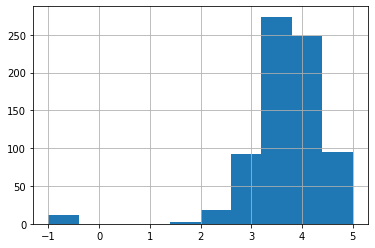

In [46]:
#Histogram for ratings
df.Rating.hist()

<AxesSubplot:>

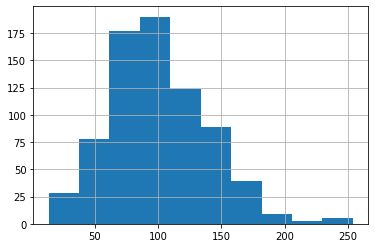

In [47]:
df.avg_salary.hist()   #tries to follow normal distriution

<AxesSubplot:>

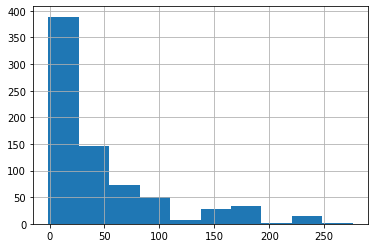

In [48]:

df.age.hist()


<AxesSubplot:>

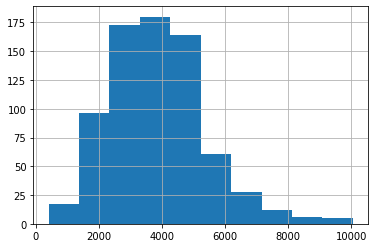

In [49]:
df.desc_len.hist()   #it also tries ti follow up normal distibutio

# BOXPLOTS

<AxesSubplot:>

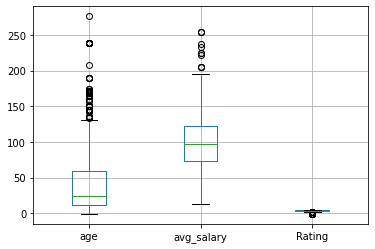

In [50]:
df.boxplot(column = ['age', 'avg_salary', 'Rating'])

<AxesSubplot:>

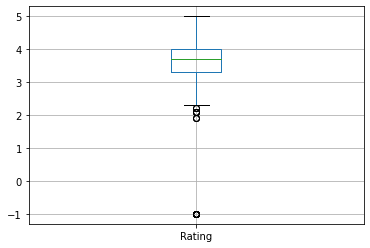

In [51]:
df.boxplot(column = 'Rating')

continous variables

In [26]:
#making correlation for continous variables.
df[['age', 'avg_salary', 'Rating', 'desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,0.019655,0.021655,0.163911
avg_salary,0.019655,1.000000,0.013492,0.078808
Rating,0.021655,0.013492,1.000000,-0.012281
desc_len,0.163911,0.078808,-0.012281,1.000000


<AxesSubplot:>

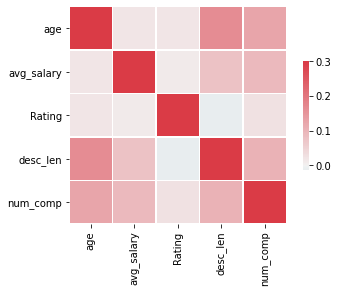

In [27]:
#drawig a heatmap to make the correlations above slightly more appealing through visualization
cmap = sns.diverging_palette(220, 10, as_cmap=True) #feature that helps in coluring
sns.heatmap(df[['age','avg_salary','Rating','desc_len','num_comp']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})  #heatmap for the correlation of the columns above.

categorical variables

In [53]:
#represent characteristics such as a person’s gender, marital status, hometown, or the types of movies they like. Categorical data can take on numerical values (such as “1” indicating male and “2” indicating female), 
#but those numbers don’t have mathematical meaning.
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer privided', 'company_txt', 'same_state', 'age',
       'min_salary', 'employer_provided', 'max_salary', 'avg_salary',
       'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'job_simp', 'seniority',
       'desc_len', 'num_comp'],
      dtype='object')

In [54]:
#categorical data
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt','same_state', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority']]

graph for Location: total = 200


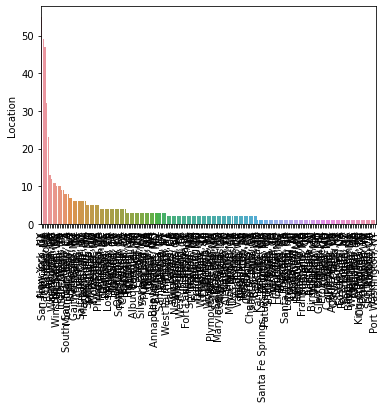

graph for Headquarters: total = 198


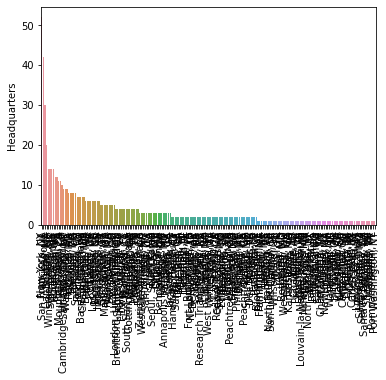

graph for Size: total = 9


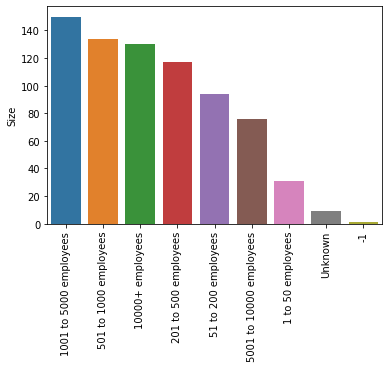

graph for Type of ownership: total = 11


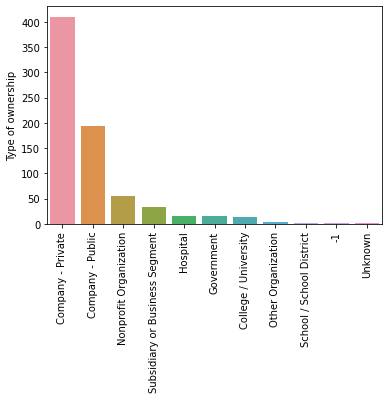

graph for Industry: total = 60


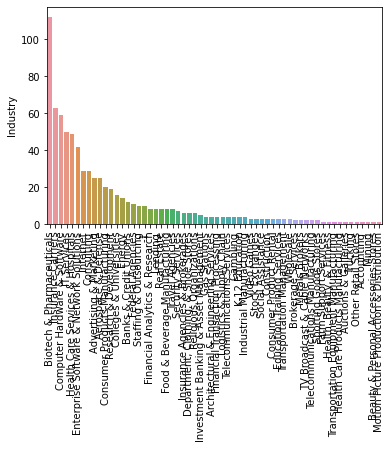

graph for Sector: total = 25


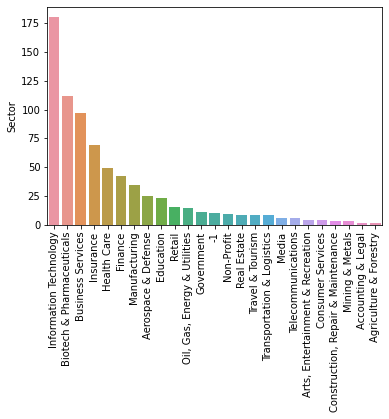

graph for Revenue: total = 14


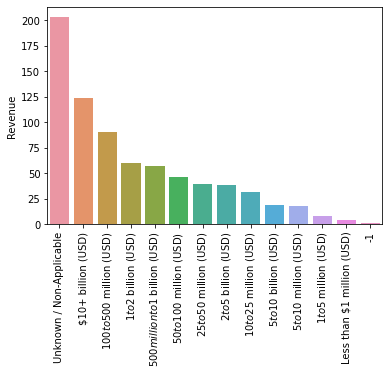

graph for company_txt: total = 343


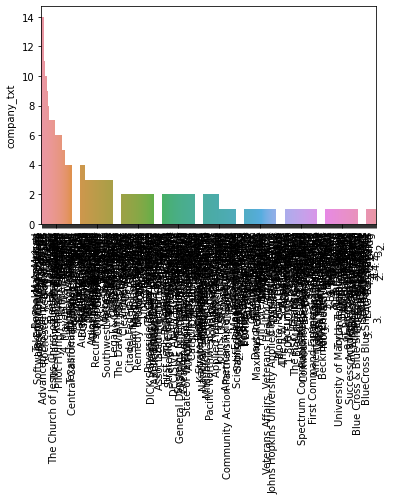

graph for same_state: total = 2


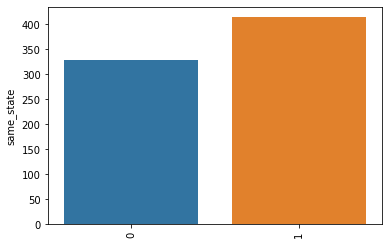

graph for python_yn: total = 2


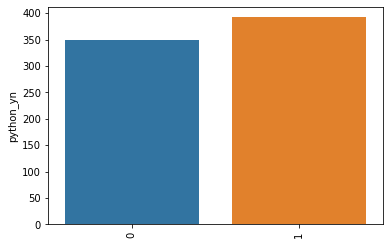

graph for R_yn: total = 2


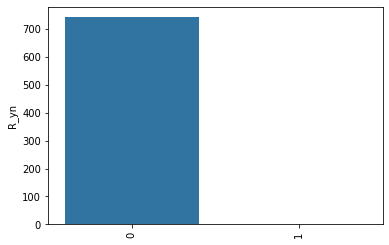

graph for spark: total = 2


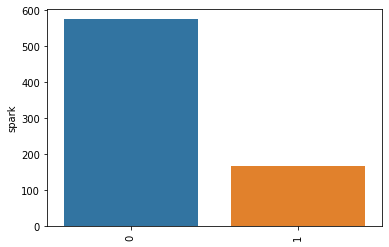

graph for aws: total = 2


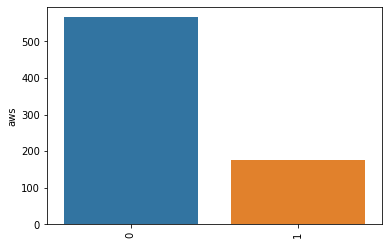

graph for excel: total = 2


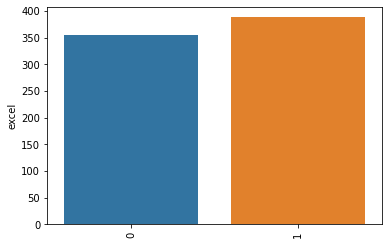

graph for job_simp: total = 7


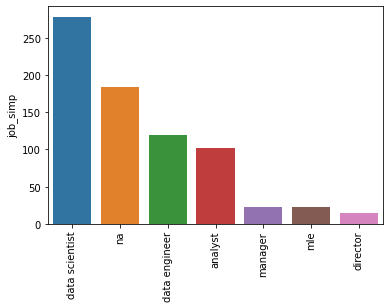

graph for seniority: total = 3


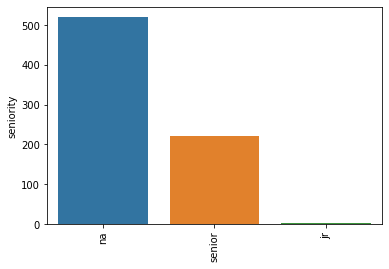

In [55]:
#making a simple bar chart for each one at once hence we shall use a for loop
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()  #number of each category
    print("graph for %s: total = %d" % (i, len(cat_num)))  #printing the number of categories at the top
    chart = sns.barplot(x=cat_num.index, y=cat_num)  #x axis with cat number index(different kinds) and y axis with the number of category
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)  #making the xlabels in 90 degress
    plt.show()



graph for Location: total = 20


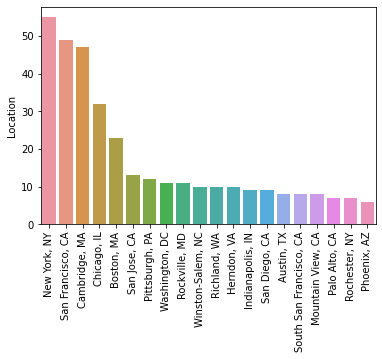

graph for Headquarters: total = 20


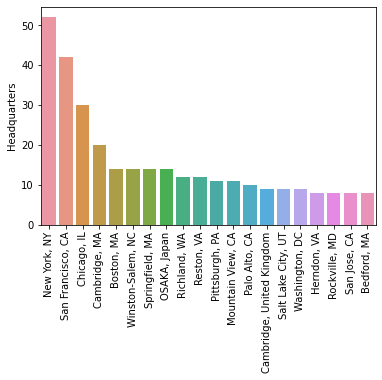

graph for company_txt: total = 20


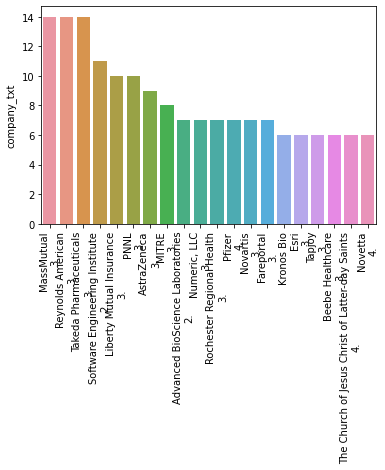

In [56]:
#Looking at the long graphs with lots of inforamtion, let us look at the first 20
for i in df_cat[['Location','Headquarters','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

PIVOT TABLES

In [57]:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')   #index is the kind 

,avg_salary
job_simp,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [58]:
pd.pivot_table(df, index = ['job_simp','seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority            
analyst        jr          56.500000
               na          61.155405
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [20]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'employer_provided', 'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'Type of ownership','avg_salary']]

In [21]:
#Doing a pivot tale once for all the aove columns
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))


Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [22]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [23]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [24]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [26]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(interpolation="bilinear")
plt.axis('off')
plt.show()

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/home/agnes/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************
